# Read STFT figures and use CNN 

# 1. load data

In [1]:
# lib


from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random

import cv2
import os
import sys
sys.path.append('..')



Using TensorFlow backend.


In [2]:
CLASS_NUM =2

#  Load data, return the data type that has been divided
def load_Train2(path):
    print("[INFO] loading images...")
    data = []
    labels = []
    # grab the image paths and randomly shuffle them
    imagePaths = sorted(list(paths.list_images(path)))
    random.seed(42)
    #random.shuffle(imagePaths)
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)  #Read picture
        image = img_to_array(image) #Convert to matrix
        data.append(image) #Add at the end

        # extract the class label from the image path and update the
        # labels list
        label = int(imagePath.split(os.path.sep)[-2])     
        labels.append(label)  
        
    # scale the raw pixel intensities to the range [0, 1]
    data = np.array(data, dtype="float") / 255.0
    labels = np.array(labels)

    trainX = data
    # convert the labels from integers to vectors
    trainY = to_categorical(labels, num_classes=CLASS_NUM)
    return trainX,trainY

In [3]:

#  Load data, return the data type that has been divided
def load_Test(path):
    print("[INFO] loading images...")
    data = []
    labels = []
    # grab the image paths and randomly shuffle them
    imagePaths = sorted(list(paths.list_images(path)))
    random.seed(42)
    #random.shuffle(imagePaths)
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)  #Read picture
        image = img_to_array(image) #Convert to matrix
        data.append(image) #Add at the end

        # extract the class label from the image path and update the
        # labels list
        label = int(imagePath.split(os.path.sep)[-2])     
        labels.append(label)  
        
    # scale the raw pixel intensities to the range [0, 1]
    data = np.array(data, dtype="float") / 255.0
    labels = np.array(labels)

    trainX = data
    # convert the labels from integers to vectors
    trainY = to_categorical(labels, num_classes=CLASS_NUM)
    return trainX,trainY

In [4]:

# tarin data 
path1 = "D:\Work\Simit\Matlab Pulse\SQI_GUI_vital_PPGECG600s\TF\Train108_seq1"
train_X, train_y = load_Train2(path1)



[INFO] loading images...


In [5]:
# test data
path2 = "D:\Work\Simit\Matlab Pulse\SQI_GUI_vital_PPGECG600s\TF\Test108_seq"
test_X, test_y = load_Test(path2)


[INFO] loading images...


In [6]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4673, 250, 334, 3)
(4673, 2)
(1131, 250, 334, 3)
(1131, 2)


In [7]:
print(train_X.shape[0] + test_X.shape[0])

5804


In [8]:
test_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
# Return from one hot code to normal code
test_y_num = np.argmax(test_y, axis=1)
print(test_y_num)

[0 0 0 ... 1 1 1]


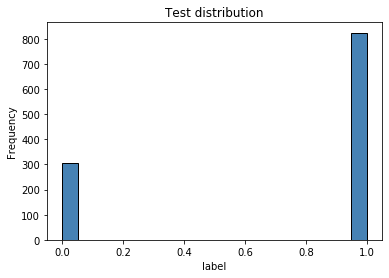

In [10]:
# https://www.cnblogs.com/LiErRui/articles/11588399.html
def Histogram_test(x):
    plt.hist(x, # 指定绘图数据
             bins = 20, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
             )
     # 添加x轴和y轴标签
    plt.xlabel('label')
    plt.ylabel('Frequency')
    # 添加标题
    plt.title('Test distribution')
    # 显示图形
    plt.show()

Histogram_test(test_y_num) 

In [11]:
def Histogram_train(x):
    plt.hist(x, # 指定绘图数据
             bins = 20, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
             )
     # 添加x轴和y轴标签
    plt.xlabel('label')
    plt.ylabel('Frequency')
    # 添加标题
    plt.title('Train distribution')
    # 显示图形
    plt.show()


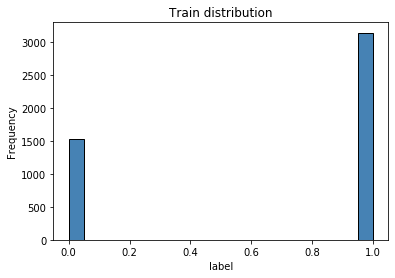

In [12]:
# Return from one hot code to normal code
train_y_num = np.argmax(train_y, axis=1)
Histogram_train(train_y_num) 

# 2. CNN

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf
import keras
from keras.optimizers import Adam

# GPU 
# Dynamic application for video memory

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))


from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(30, (5,5), activation='relu',strides=1,padding='same',input_shape=[train_X.shape[1], train_X.shape[2], 3]))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(30, (5,5), activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30, (5,5), activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30, (5,5), activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30, (5,5), activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# compile
model.compile(loss = binary_crossentropy, #categorical_crossentropy,
             optimizer=Adam(lr = 0.00005),
             metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 334, 30)      2280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 83, 111, 30)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 83, 111, 30)       22530     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 55, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 55, 30)        22530     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 27, 30)        0         
______________________________________

# Train

In [14]:
batch_size = 32
epochs = 90

train_history = model.fit(train_X,train_y_num,validation_data=(test_X,test_y_num),batch_size=batch_size,epochs=epochs)


Train on 4673 samples, validate on 1131 samples
Epoch 1/90
4673/4673 [==============================] - 30s 6ms/step - loss: 0.6342 - accuracy: 0.6328 - val_loss: 0.4139 - val_accuracy: 0.8700
Epoch 2/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.3769 - accuracy: 0.8301 - val_loss: 0.2362 - val_accuracy: 0.9222
Epoch 3/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.3165 - accuracy: 0.8814 - val_loss: 0.2197 - val_accuracy: 0.9337
Epoch 4/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.2936 - accuracy: 0.8919 - val_loss: 0.2307 - val_accuracy: 0.9372
Epoch 5/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.2620 - accuracy: 0.9035 - val_loss: 0.2318 - val_accuracy: 0.9107
Epoch 6/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.2614 - accuracy: 0.9069 - val_loss: 0.2361 - val_accuracy: 0.9363
Epoch 7/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.23

4673/4673 [==============================] - 24s 5ms/step - loss: 0.1108 - accuracy: 0.9651 - val_loss: 0.0559 - val_accuracy: 0.9876
Epoch 56/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.0947 - accuracy: 0.9655 - val_loss: 0.0531 - val_accuracy: 0.9885
Epoch 57/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.0940 - accuracy: 0.9666 - val_loss: 0.0622 - val_accuracy: 0.9797
Epoch 58/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.0889 - accuracy: 0.9668 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 59/90
4673/4673 [==============================] - 23s 5ms/step - loss: 0.0922 - accuracy: 0.9679 - val_loss: 0.0543 - val_accuracy: 0.9867
Epoch 60/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.0897 - accuracy: 0.9668 - val_loss: 0.0510 - val_accuracy: 0.9841
Epoch 61/90
4673/4673 [==============================] - 24s 5ms/step - loss: 0.0873 - accuracy: 0.9681 - val_loss: 0.0462 - val_accurac

# 3. Test Results

In [15]:
loss, accuracy = model.evaluate(test_X, test_y_num, verbose=1)
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))

1131/1131 [==============================] - 3s 3ms/step
loss:0.0461 accuracy:0.9823


In [16]:
loss, accuracy = model.evaluate(train_X, train_y_num, verbose=1)
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))

4673/4673 [==============================] - 15s 3ms/step
loss:0.0434 accuracy:0.9861


# 4. plot accuracy

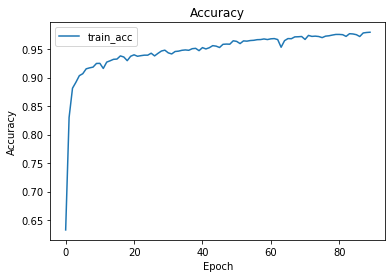

In [17]:
import matplotlib.pyplot as plt
def show_train_acc(train_history,train_acc):
    plt.plot(train_history.history[train_acc])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc'], loc='upper left')
    plt.show()
    
show_train_acc(train_history,'accuracy')

In [18]:
print(np.asarray(train_history.history['accuracy']))

[0.63278407 0.8300877  0.8814466  0.89193237 0.9034881  0.906912
 0.91547185 0.9171838  0.9184678  0.92488766 0.92510164 0.91611385
 0.9272416  0.92959553 0.9321635  0.9325915  0.93815535 0.9362294
 0.9298096  0.93751335 0.9400813  0.93751335 0.9385834  0.93943936
 0.93943936 0.9428633  0.93815535 0.94264925 0.9467152  0.94821316
 0.9435052  0.9415793  0.9458592  0.9465012  0.9479991  0.9486411
 0.9479991  0.9507811  0.95142305 0.9473572  0.95270705 0.9503531
 0.9524931  0.956131   0.955275   0.95292103 0.9584849  0.9589129
 0.9586989  0.9646908  0.9636208  0.9597689  0.96447676 0.9640488
 0.96511877 0.9655468  0.96661675 0.96683073 0.9679007  0.96683073
 0.9681147  0.9685427  0.96683073 0.95334905 0.9649048  0.9685427
 0.9683287  0.9715386  0.97175264 0.9721806  0.9670447  0.97410655
 0.9723946  0.9728226  0.9721806  0.97025466 0.9728226  0.9734646
 0.97474855 0.9758185  0.9758185  0.97539055 0.9723946  0.9771025
 0.9766745  0.97539055 0.9721806  0.97838646 0.97924244 0.97967046]


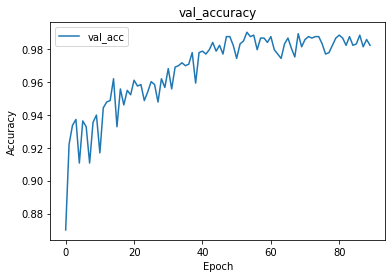

In [19]:
import matplotlib.pyplot as plt
def show_train_acc(train_history,train_acc):
    plt.plot(train_history.history[train_acc])
    plt.title('val_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['val_acc'], loc='upper left')
    plt.show()
    
show_train_acc(train_history,'val_accuracy')

In [20]:
print(np.asarray(train_history.history['val_accuracy']))

[0.87002653 0.92219275 0.93368703 0.93722367 0.91069847 0.9363395
 0.93280286 0.91069847 0.93545532 0.9398762  0.9168877  0.94429708
 0.94783378 0.94871795 0.96198052 0.93280286 0.95579135 0.94606543
 0.95490718 0.95225465 0.96109635 0.9575597  0.95844388 0.94871795
 0.954023   0.96021223 0.95844388 0.94783378 0.96198052 0.95667553
 0.96816975 0.95579135 0.96905392 0.9699381  0.97170645 0.9699381
 0.97082227 0.97789568 0.95932806 0.97789568 0.97877985 0.9770115
 0.97966403 0.9840849  0.97877985 0.98231655 0.9770115  0.98762155
 0.98762155 0.98231655 0.97435898 0.98320073 0.98496908 0.99027407
 0.98762155 0.98850572 0.97966403 0.98673743 0.98673743 0.9840849
 0.98762155 0.97966403 0.9770115  0.97435898 0.98320073 0.98673743
 0.9805482  0.97524315 0.9893899  0.98143238 0.98585325 0.98762155
 0.98673743 0.98762155 0.98762155 0.98320073 0.9770115  0.97789568
 0.98231655 0.98673743 0.98850572 0.98673743 0.98231655 0.98762155
 0.98231655 0.98320073 0.98850572 0.98143238 0.98585325 0.98231655

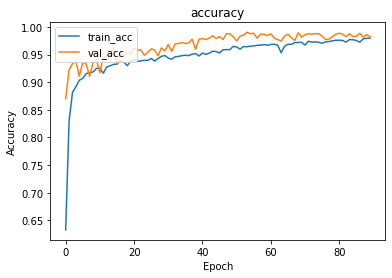

In [21]:
# 两个绘图
def show_acc(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc','val_acc'], loc='upper left')
    plt.show()
    
show_acc(train_history,'accuracy','val_accuracy')

# 5. plot loss

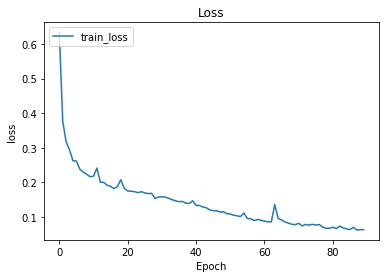

In [22]:
import matplotlib.pyplot as plt
def show_train_acc(train_history,train_acc):
    plt.plot(train_history.history[train_acc])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss'], loc='upper left')
    plt.show()
    
show_train_acc(train_history,'loss')

In [23]:
print(np.asarray(train_history.history['loss']))

[0.63423319 0.37692213 0.31650507 0.29362839 0.26200312 0.2614029
 0.23780553 0.22904947 0.22308763 0.21570583 0.21725738 0.24090231
 0.20023816 0.19921469 0.19130033 0.1879536  0.18137285 0.18759694
 0.20697379 0.18213746 0.17479399 0.17351842 0.17274172 0.16966414
 0.17246031 0.16897244 0.16694749 0.16779117 0.15275744 0.15713654
 0.15756519 0.1566667  0.15338388 0.14926513 0.14580769 0.14379452
 0.14434023 0.13923647 0.13831114 0.14616098 0.13284842 0.13246235
 0.12808391 0.12594025 0.1197333  0.11760034 0.11731369 0.11360504
 0.11445781 0.10891562 0.10775523 0.10437038 0.10257915 0.10065532
 0.11075353 0.09473434 0.094028   0.08885812 0.0922131  0.08970739
 0.08730167 0.08536377 0.0851345  0.13513709 0.09540952 0.09054657
 0.08470024 0.08158865 0.07799371 0.07711139 0.08107596 0.07327202
 0.07796553 0.07550425 0.07807685 0.07590395 0.07744111 0.07037286
 0.06635629 0.06657425 0.06958057 0.0653498  0.07306614 0.06775161
 0.06462561 0.06297412 0.06917719 0.06179678 0.06250021 0.06260

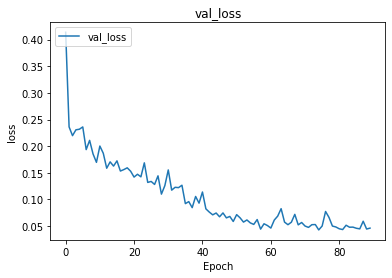

In [24]:
import matplotlib.pyplot as plt
def show_train_acc(train_history,train_acc):
    plt.plot(train_history.history[train_acc])
    plt.title('val_loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['val_loss'], loc='upper left')
    plt.show()
    
show_train_acc(train_history,'val_loss')

In [25]:
print(np.asarray(train_history.history['val_loss']))

[0.41388847 0.23616852 0.21974493 0.23069983 0.23176827 0.23610882
 0.19354493 0.21086439 0.18544184 0.16961774 0.20021732 0.18660943
 0.15857984 0.17050554 0.16260427 0.17239584 0.15330307 0.15601515
 0.15932852 0.15291896 0.14195763 0.14724322 0.14239288 0.1686631
 0.13192783 0.13375857 0.12811359 0.14425634 0.10995137 0.12587439
 0.15534649 0.11740585 0.12275823 0.12212408 0.12663514 0.09210949
 0.09587231 0.08458694 0.10554498 0.09301819 0.11391586 0.08230495
 0.07620189 0.07107484 0.07447103 0.06741522 0.07463816 0.06536986
 0.06805343 0.05858309 0.07140596 0.06542368 0.05743816 0.06143725
 0.05589026 0.05308107 0.06218693 0.04429354 0.05427641 0.05097867
 0.04623605 0.06126333 0.06861548 0.08263071 0.05739439 0.05256069
 0.05722039 0.07194659 0.05227069 0.05667735 0.05001835 0.0474782
 0.05257664 0.05283212 0.0427477  0.05008251 0.07736817 0.06618753
 0.05000165 0.04828562 0.04487646 0.04342525 0.05154781 0.0478191
 0.04799372 0.04585263 0.04472854 0.05903645 0.04441844 0.0461184

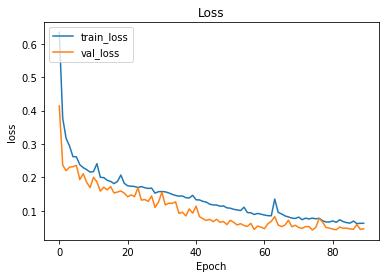

In [26]:

def show_loss(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss','val_loss'], loc='upper left')
    plt.show()
    
show_loss(train_history,'loss','val_loss')

# 6.confuse matrix

In [27]:
prediction=model.predict_classes(test_X)
prediction.shape

(1131, 1)

In [28]:
prediction_cls=model.predict(test_X)
prediction_cls.shape

(1131, 1)

In [29]:
import numpy as np
test_y.shape
# Convert from one-hot to normal np array
test_label = [np.argmax(one_hot)for one_hot in test_y]
test_label1=np.asarray(test_label)
test_label1.shape

(1131,)

In [30]:
prediction2 = prediction.reshape(prediction.shape[0],)
prediction2.shape

(1131,)

In [31]:
# example
import numpy as np

n = len(prediction2)

# 0. bad
bad_indices = [i for i in range(n) if prediction2[i]==0] 
print(bad_indices)

# 1. good
good_indices = [i for i in range(n) if prediction2[i]==1] 
print(good_indices)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

In [32]:
# confuse matrix
import pandas as pd
pd.crosstab(test_label1,prediction2,
            rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0,290,17
1,3,821


# 7. save model

In [33]:
mp = "D:/jupyter/CNN_Vital108tf_sqi2111.h5"
model.save(mp)

# 8. Metrics

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score, precision_recall_fscore_support, roc_curve, classification_report

y = test_label1
y_score = prediction
obj1 = confusion_matrix(y, y_score) #
print('confusion_matrix\n', obj1)

print('accuracy:{}'.format(accuracy_score(y, y_score))) # 
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
print('precision:{}'.format(precision_score(y, y_score,average='binary'))) # macro  weighted
print('recall:{}'.format(recall_score(y, y_score,average='binary')))
print('f1-score:{}'.format(f1_score(y, y_score,average='binary')))
print('f1-score-for-each-class:{}'.format(precision_recall_fscore_support(y, y_score))) # for macro

confusion_matrix
 [[290  17]
 [  3 821]]
accuracy:0.982316534040672
precision:0.9797136038186157
recall:0.9963592233009708
f1-score:0.9879663056558363
f1-score-for-each-class:(array([0.98976109, 0.9797136 ]), array([0.94462541, 0.99635922]), array([0.96666667, 0.98796631]), array([307, 824], dtype=int64))


In [35]:
# https://blog.csdn.net/weixin_43240818/article/details/88364755
from sklearn.metrics import classification_report
report_ANN = classification_report(y, y_score,digits=3)
print(report_ANN)

              precision    recall  f1-score   support

           0      0.990     0.945     0.967       307
           1      0.980     0.996     0.988       824

    accuracy                          0.982      1131
   macro avg      0.985     0.970     0.977      1131
weighted avg      0.982     0.982     0.982      1131



AUC y_pred = proba: 0.9982448372916732
one-hot label ravelled shape: (1131,)


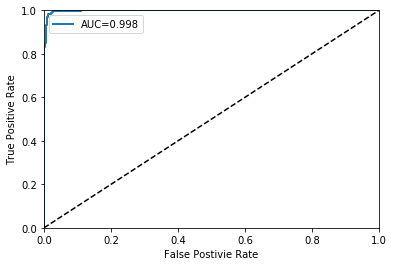

              precision    recall  f1-score   support

           0      0.990     0.945     0.967       307
           1      0.980     0.996     0.988       824

    accuracy                          0.982      1131
   macro avg      0.985     0.970     0.977      1131
weighted avg      0.982     0.982     0.982      1131



In [36]:
# AUC value
y_one_hot = test_y_num
y_score_pro = prediction_cls
auc = roc_auc_score(y_one_hot, y_score_pro,average='micro') # Using micro, n_classes roc curves will be calculated and averaged
print("AUC y_pred = proba:", auc)

# Draw ROC curve
print("one-hot label ravelled shape:", y_one_hot.ravel().shape)
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel()) # 
#print("threshold： ", thresholds)
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--') # Draw a straight line with y=x, the color and type of the line
plt.axis([0,1.0,0,1.0]) # Limit the coordinate range
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

ans = classification_report(y, y_score,digits=3) # Keep 3 significant digits after the decimal point
print(ans)


In [37]:
print(fpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00325733
 0.00325733 0.00651466 0.00651466 0.00977199 0.00977199 0.01302932
 0.01302932 0.01628664 0.01628664 0.01954397 0.01954397 0.0228013
 0.0228013  0.02605863 0.02605863 0.05211726 0.05211726 0.07166124
 0.07166124 0.07491857 0.07491857 0.11074919 0.11074919 0.61889251
 0.62540717 0.6286645  0.63517915 0.63843648 0.64495114 0.65472313
 0.667752

In [38]:
print(tpr)

[0.         0.00121359 0.01699029 0.02184466 0.02305825 0.02548544
 0.0631068  0.06553398 0.10194175 0.10436893 0.10558252 0.10800971
 0.13349515 0.13592233 0.13713592 0.13956311 0.16868932 0.1711165
 0.17354369 0.17718447 0.19174757 0.19538835 0.19660194 0.19902913
 0.20509709 0.20752427 0.20995146 0.21237864 0.21359223 0.21601942
 0.22208738 0.22451456 0.24271845 0.24514563 0.27427184 0.27791262
 0.28276699 0.28519417 0.32160194 0.32402913 0.3434466  0.34830097
 0.36771845 0.37014563 0.37257282 0.375      0.37742718 0.37985437
 0.44174757 0.44538835 0.4684466  0.47087379 0.54004854 0.54247573
 0.55218447 0.55461165 0.55703883 0.55946602 0.57645631 0.5788835
 0.63592233 0.63834951 0.81674757 0.81917476 0.83373786 0.83373786
 0.85072816 0.85072816 0.93325243 0.93325243 0.9684466  0.9684466
 0.9842233  0.9842233  0.98543689 0.98543689 0.98786408 0.98786408
 0.99393204 0.99393204 0.99514563 0.99514563 0.99635922 0.99635922
 0.99757282 0.99757282 0.99878641 0.99878641 1.         1.
 1.   